In [1]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [2]:
pd.isna(dados).sum() #quantidade de NaN's em cada coluna

Rua          3434
Bairro         12
Cidade          0
Metragem        0
Quartos         0
Banheiros       0
Vagas           0
Valor           0
dtype: int64

In [3]:
dados.sample(10)  #pega uma linha aleatoria (n) n = quantidade de exemplos
dados["Bairro"] # imprime uma coluna 
dados['Bairro'][6522] #entra na coluna e pega a linha indicada.
dados.info() #pegar informações sobre o dataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Nota-se que valor está com o tipo de object, e para utilizarmos em cálculos, temos que transformálo em dados do type float ou int.

In [4]:
dados.Metragem  #outra forma de busca apenas uma coluna
dados.Metragem.mean() #método de média aplicada na coluna Metragem

442.30065947242207

In [5]:
#Como fazer para buscar a média das metragens apenas dos itens do Bairro 'Vila Mariana'

dados['Bairro'] == 'Vila Mariana' #faz a coluna de TRUE e FALSE  para todas as linhas dos valores da coluna

(dados['Bairro'] == 'Vila Mariana')*1 #faz a coluna de TRUE == 1  e FALSE == 0  para todas as linhas

sum((dados['Bairro'] == 'Vila Mariana')) # Faz a soma de todos os valores True.


184

Logo, há 184 imóveis na vila Mariana

In [6]:
aux_imoveis_mariana = (dados['Bairro'] == 'Vila Mariana')  #criando uma variável com a coluna True e False para imoveis Vila Mariana

imoveis_mariana = dados[aux_imoveis_mariana] #retorna ao dataframe filtrando apenas o Bairro Vila Mariana

#para a média de metragem do bairro vila mariana, 
imoveis_mariana['Metragem'].mean()

233.6195652173913

In [7]:
#Para ver a contagem de quantos imóveis tem em cada Bairro?

dados['Bairro'].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

nota-se que existem 701 bairros

Para imprimir um gráfico mostrando as quantidades de bairros utilizando o pandas...

<AxesSubplot:>

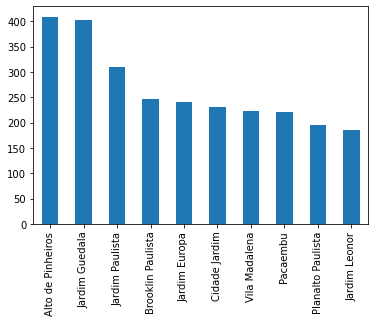

In [8]:
n_imoveis_bairro = dados['Bairro'].value_counts()
n_imoveis_bairro.plot.bar() #gera um grafico muito poluído
n_imoveis_bairro.head(10).plot.bar()  #gera um grafico com os 10 primeiros

Desafios:

1 - Realizar a média da metragem para cara um dos bairros (Paulo)

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

In [9]:
#Desafio 1:  Realizar a média da metragem para cara um dos bairros
dados.groupby('Bairro')['Metragem'].mean()

#or dados[["Bairro","Metragem"]].groupby("Bairro").mean()

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

In [10]:
#Desafio 2:  2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas)
dados['Bairro']

dados.iloc[:, 1:2]


,Bairro
0,Planalto Paulista
1,Jardim dos Estados
2,Jardim Reimberg
3,Jardim Morumbi
4,Mooca
...,...
10003,Vila Sofia
10004,Bosque da Saúde
10005,Vila da Saúde
10006,Vila Oratório


<AxesSubplot:xlabel='Bairro'>

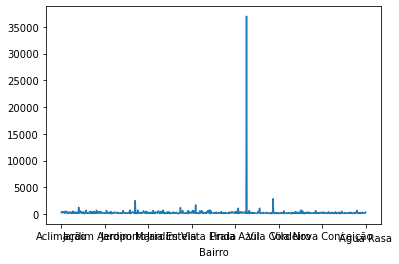

In [11]:
#Desafio 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão

metragem_media = dados.groupby('Bairro')['Metragem'].mean()
metragem_media.plot.line()


Conclui-se que há um valor de metragem muito descrepante, podendo ser um erro de digitação ou apenas um dado muito discrepante que deve ser removido

In [12]:
#localizando a discrepancia
dados['Metragem'].max()
dados['Metragem'] == 750000
display(dados.loc[dados['Metragem'] == 750000])
#or display(dados.index[dados['Metragem'] == 750000])
#or display(dados.iloc[9845:9847, :])

#eliminando o indice 9845
dados_aux = dados.drop(9845) 


display(dados_aux[9840:9850])

dados_aux['Metragem'].max()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9845,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,R$ 7.000.000


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9840,Rua Agostinho Gomes,Ipiranga,São Paulo,150,2,3,2,R$ 930.000
9841,NaN,Jardim Paulistano,São Paulo,720,6,6,5,R$ 9.800.000
9842,NaN,Jardim Danfer,São Paulo,300,2,1,4,R$ 800.000
9843,"Rua José Santana, 480",Vila Reis,São Paulo,66,2,1,2,R$ 320.004
9844,Rua Stela Marina,Brooklin Paulista,São Paulo,386,5,5,2,R$ 7.700\n /Mês
9846,Rua João Álvares Soares,Brooklin Novo,São Paulo,175,2,2,3,R$ 1.850.000
9847,Rua Januário Miraglia,Vila Nova Conceição,São Paulo,180,3,2,4,R$ 2.980.000
9848,Rua Quirino Pucca,Vila Romana,São Paulo,85,1,1,2,R$ 480.000
9849,Rua Teerã,Parque da Lapa,São Paulo,145,3,2,2,R$ 795.000
9850,"Rua Doutor Sarmento, 22",Jardim Luzitânia,São Paulo,1050,5,7,10,R$ 20.000.000


37000

In [13]:
#localizando a discrepancia
dados_aux['Metragem'].max()
dados_aux['Metragem'] == 37000
display(dados_aux.loc[dados_aux['Metragem'] == 37000])

#eliminando o indice 6600
dados_aux = dados_aux.drop(6600)

display(dados_aux[9843:9847])
display(dados_aux[6598:6602])

dados_aux['Metragem'].max()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9844,Rua Stela Marina,Brooklin Paulista,São Paulo,386,5,5,2,R$ 7.700\n /Mês
9846,Rua João Álvares Soares,Brooklin Novo,São Paulo,175,2,2,3,R$ 1.850.000
9847,Rua Januário Miraglia,Vila Nova Conceição,São Paulo,180,3,2,4,R$ 2.980.000
9848,Rua Quirino Pucca,Vila Romana,São Paulo,85,1,1,2,R$ 480.000


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6598,"Avenida Mauro Marques da Silva, 156",Vila Antônio,São Paulo,80,2,1,2,R$ 375.000
6599,NaN,Santo Amaro,São Paulo,420,3,5,3,R$ 1.980.000
6601,"Rua Araxiá, 122",Jardim Guedala,São Paulo,461,4,5,3,R$ 2.350.000
6602,NaN,Vila Suzana,São Paulo,185,3,3,3,R$ 870.000


35677

<AxesSubplot:xlabel='Bairro'>

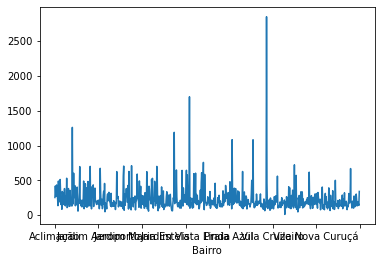

In [14]:
#novo grafico
grafico = dados_aux.groupby('Bairro')['Metragem'].mean()
grafico.plot.line()


In [16]:
null_bairro = dados[dados['Bairro'].isnull()]
display(null_bairro)
 
#or bairros_sem_rua = dados[dados["Bairro"].isna()]


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7263,"Rua Madalena de Morais, 3773",NaN,São Paulo,742,4,8,6,R$ 9.800\n /Mês
7956,Rua Vergueiro,NaN,São Paulo,103,3,2,2,R$ 640.000
7996,"Rua Alvorada do Sul, 3773",NaN,São Paulo,678,4,8,8,R$ 6.895.000
8126,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,550,3,5,6,R$ 4.000.000
8566,"Avenida Comendador Adibo Ares, 3773",NaN,São Paulo,694,4,6,6,R$ 3.890.000
8619,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,R$ 6.895.000
8739,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,R$ 6.895.000
8868,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000
8943,"Rua Santo Eufredo, 3773",NaN,São Paulo,846,4,8,8,R$ 30.000\n /Mês
8992,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000
